In [1]:
import pandas as pd

from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.preprocessing import QuantileTransformer
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import ensemble, linear_model
from xgboost.sklearn import XGBRegressor

from utils import metrics

InteractiveShell.ast_node_interactivity = 'all'

df_features = pd.read_csv('./data/120_agg_txn.csv')
df_train = pd.read_csv('./data/003_train.csv')
df_test  = pd.read_csv('./data/004_test.csv')

df_features = df_features.set_index('id')
df_features.head()

,c7_n7,c5__0,c5__1,c5__2,c5__3,c5__4,c5__5,c5__6,c5__7,c5__8,...,n6_min,n7_min,n4_median,n5_median,n6_median,n7_median,n4_std,n5_std,n6_std,n7_std
id,,,,,,,,,,,,,,,,,,,,,
1,2080.004732,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,225,600.0,101.0,492.0,268.0,3316.099997,5.225850,297.933471,17.902172
2,2255.763324,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,563,12500.0,101.0,0.0,3562.0,52598.838962,11.583221,296.248485,306.363400
3,2080.880615,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,411,2000.0,101.0,0.0,1754.0,2634.678530,7.188408,200.244568,493.901956
4,2777.815120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,2825,8200.0,101.0,407.0,2825.0,92730.728802,5.102980,300.920839,0.000000
5,2747.669596,27.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,4353,2000.0,101.0,400.0,4353.0,30733.752750,8.556223,304.693080,0.000000


In [2]:
qt = QuantileTransformer(n_quantiles=10, random_state=100, output_distribution='normal')

df_features[:] = qt.fit_transform(df_features[:])
df_features.head()

,c7_n7,c5__0,c5__1,c5__2,c5__3,c5__4,c5__5,c5__6,c5__7,c5__8,...,n6_min,n7_min,n4_median,n5_median,n6_median,n7_median,n4_std,n5_std,n6_std,n7_std
id,,,,,,,,,,,,,,,,,,,,,
1,-1.457178,0.645631,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-1.346113,-0.764710,-1.22064,1.185480,-1.579968,-0.365750,-1.778409,-0.753802,0.457778
2,-0.026796,-0.139710,1.236227,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-0.757039,1.224043,-1.22064,-5.199338,0.924371,1.222230,-1.381954,-0.789349,0.841516
3,-1.455086,0.139710,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-0.973982,1.056810,-1.22064,-5.199338,-0.315520,-0.571436,-1.627508,-1.402740,0.996143
4,1.599232,-0.589456,-5.199338,-5.199338,-5.199338,-5.199338,1.220640,-5.199338,-5.199338,-5.199338,...,-5.199338,0.617897,1.222620,-1.22064,0.791639,0.399662,1.224477,-1.789307,-0.659309,-5.199338
5,1.559258,1.224655,-5.199338,-5.199338,-5.199338,-5.199338,1.229444,-5.199338,-5.199338,-5.199338,...,-5.199338,1.260110,1.056810,-1.22064,0.764710,1.244045,1.221008,-1.540872,-0.547760,-5.199338


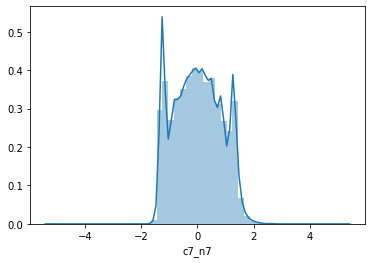

In [3]:
sns.distplot(df_features['c7_n7'])

In [4]:
df_features.to_csv('./data/320_features_txn.csv')

In [5]:
joblib.dump(qt, 'M_336/320_qt_normal.joblib')

['M_336/320_qt_normal.joblib']